In [1]:
#Importing library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Importing dataset

df = pd.read_csv("dataset/rand/train_rand_noout3.csv")

In [3]:
print("Before cleaning, number of features %d"%df.shape[1])
df_no_attrib=df.drop(['StoreID', 'Max_Gust_SpeedKm_h'], axis=1)
print("After cleaning, %d features remain"%df_no_attrib.shape[1])

Before cleaning, number of features 49
After cleaning, 47 features remain


In [4]:
print("The number of istances are: %d"%df.shape[0])
df_deleted_rows = df_no_attrib.dropna(axis=0)
print("The number of istances left are: %d"%df_deleted_rows.shape[0])

The number of istances are: 357072
The number of istances left are: 357072


In [5]:
categorical_mask=df_deleted_rows.dtypes==object
attributes_to_drop=df_deleted_rows.columns[categorical_mask]
df_cleaned=df_deleted_rows.drop(attributes_to_drop, axis=1)
print("After cleaning, %d features remain"%df_cleaned.shape[1])
df_cleaned.head(4)

After cleaning, 46 features remain


,Unnamed: 0,Unnamed: 0.1,IsHoliday,HasPromotions,StoreType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,...,Hail,Thunderstorm,IsSaturday,IsSunday,OrdinalDate,WasOpenYesterday,IsOpenTomorrow,MeanMonthSales,MeanStoreSales,StdStoreSales
0,0,0,0,0,2,326,7,5676,9643,17130,...,0,0,0,0,0,1,1,5013.828202,7675.446488,1890.559268
1,1,1,0,0,2,326,7,8111,9643,17130,...,0,0,0,0,1,1,0,5013.828202,7675.446488,1890.559268
2,2,2,0,0,2,326,7,8300,9643,17130,...,0,0,0,0,3,1,1,5013.828202,7675.446488,1890.559268
3,3,3,0,0,2,326,7,7154,9643,17130,...,0,0,1,0,4,1,0,5013.828202,7675.446488,1890.559268


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
df_normalized=StandardScaler().fit_transform(df_cleaned)

In [8]:
df_normalized[4]

array([-1.73199348, -1.73267341, -0.03194437,  1.11793677,  0.77194646,
       -0.66235357,  0.37577237,  2.35222634, -0.28772056,  1.11832523,
       -0.378561  , -1.40915499, -1.92682014, -0.04088064,  0.82891032,
       -0.55916298,  0.77902266,  0.24298892, -1.73272757, -0.70078556,
        0.66628566, -1.05071559,  1.90754868, -0.08113857, -1.46058261,
       -1.2532454 ,  0.48388952, -1.45589719,  1.72462897, -0.29756214,
       -0.96639267, -0.07042052, -0.86856904, -1.20656861, -0.23333463,
       -0.59256037, -0.06922573, -0.26548985, -0.45577176, -0.06365495,
       -1.67845604,  0.47378493,  0.49187605,  0.27186718,  1.6215459 ,
        1.23620622])

In [10]:
pca=PCA(n_components=25)
new_data = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13','principal component 14','principal component 15','principal component 16','principal component 17','principal component 18','principal component 19', 'principal component 20', 'principal component 21', 'principal component 22', 'principal component 23','principal component 24','principal component 25'])
df_pca.head(4)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25
0,4.341052,1.874538,-1.196852,1.696739,0.729979,0.438202,2.226618,1.719822,0.994986,1.498372,...,-0.686856,-0.391281,-1.154365,1.140879,1.703054,-1.067286,-0.554236,-2.099716,1.274747,1.038863
1,3.413594,3.433871,-0.435275,1.498952,1.394214,1.005248,2.708207,0.180056,1.212389,0.822350,...,-0.751514,-0.565021,-0.863024,1.701955,1.660221,-1.898437,-0.161044,-0.864417,1.189863,0.884821
2,2.562549,2.437507,0.542873,2.073937,0.648804,0.350838,2.307292,1.339347,1.086986,0.296838,...,-0.194851,-0.377691,-0.685798,-0.137680,0.675939,0.799705,-0.220039,-0.194735,-1.136485,0.647284
3,2.103084,4.754784,0.905806,0.404468,2.113351,2.024392,3.226460,-0.361825,1.309836,-0.199867,...,-0.169951,-0.179542,-0.541941,0.332158,0.173775,-0.115051,0.692761,0.924619,-1.049423,0.394028


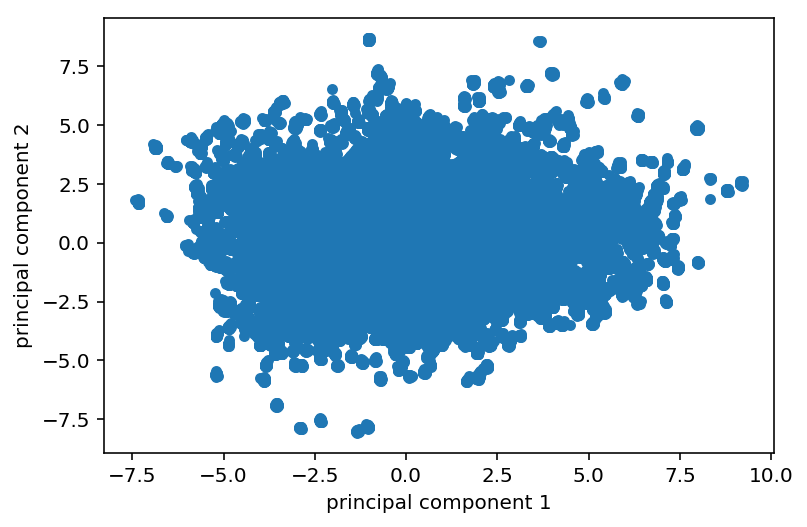

In [11]:
df_pca.plot(kind="scatter", x="principal component 1", y="principal component 2")

In [12]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Component 3 %3.2f"%(pca.explained_variance_ratio_[2]))
print("   Component 4 %3.2f"%(pca.explained_variance_ratio_[3]))
print("   Component 5 %3.2f"%(pca.explained_variance_ratio_[4]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))

Explained Variance
   Component 1 0.15
   Component 2 0.09
   Component 3 0.08
   Component 4 0.06
   Component 5 0.05
   Total Explained Variance 0.91
